# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

import os
from google.colab import drive

import warnings
warnings.filterwarnings("ignore")

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++


Una curva de aprendizaje es un gráfico que muestra el progreso de un modelo de aprendizaje automático a lo largo de su entrenamiento en relación con una métrica específica de aprendizaje.

Es una herramienta fundamental para varios propósitos, incluyendo la comparación de diferentes algoritmos, la selección y ajuste de hiperparámetros, y la determinación del tamaño óptimo del conjunto de datos de entrenamiento.

Durante el entrenamiento, el modelo se evalúa tanto con el conjunto de datos de entrenamiento como con el de validación para comprender su capacidad de aprendizaje y generalización.

La forma de la curva de aprendizaje puede diagnosticar el rendimiento del modelo, ayudando a determinar si está subentrenado, sobreentrenado o bien entrenado.

- **Modelo Subentrenado:**
  - Puede identificarse mediante el estancamiento de la métrica de desempeño de entrenamiento, indicando que el modelo no está aprendiendo adecuadamente.
  - También puede manifestarse si la mejoría de la métrica de desempeño de entrenamiento sigue disminuyendo al final del entrenamiento, sugiriendo que el modelo podría beneficiarse de más entrenamiento.

- **Modelo Sobreentrenado:**
  - Ocurre cuando el modelo tiene más capacidad de la necesaria o cuando se entrena durante demasiado tiempo.
  - Se refleja en la curva si la desmemoria de la métrica de desempeño del conjunto de entrenamiento sigue disminuyendo mientras que la la métrica de desempeño del conjunto  validación comienza a aumentar, indicando que el modelo está memorizando los datos de entrenamiento y no generaliza bien.

- **Modelo Bien Entrenado:**
  - Es el objetivo del entrenamiento, donde el modelo se ajusta adecuadamente sin estar subentrenado ni sobreentrenado.
  - Se identifica por métricas de entrenamiento y validación que mejoran y convergen a un punto estable, con una diferencia mínima entre ellas.

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**

El artículo aborda el reto de predecir el rendimiento de las publicaciones y anuncios en la plataforma de redes sociales Facebook con el objetivo de proporcionar ventajas a las empresas y a los equipos de mercadeo y publicidad para maximizar el impacto de sus publicaciones con el objectivo de mejorar:

Esta capacidad de predicción permite a las empresas alinear estratégicamente las promociones de sus productos y servicios según el impacto previsto de las publicaciones, mejorando así su eficacia y alcance en la audiencia objetivo.

El autor propone los siguientes efectos de impacto para las empresas como resultado de la utilizacion de utilization de modelos de prediccion del rendimiento de las publicaciones:

* Popularidad
* Conocimiento (awareness)
* Satisfaccion
* Apego
* Lealtad
* Intención de Compra



### ++++++++ Inicia la sección de agregar texto: +++++++++++




### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

**Variables de Entrada:**

*   **Category**:

    Variable categorica nominal de codificada numericamente [1,2,3] que denotan las caracterizaciones: Accion, Producto e Inspiracion
    Categorizacion creada por la persona que gestiona la pagina de Facebook como resultado de una solicitud de los altos directivos de marketing de la empresa en lo que se refiere a los tipos de campañas realizadas por esta.

*   **Page Total Likes:**

    Variable numerica discreta
    Denota el numero personas que han dado click al link de me gusta "like" de la pagina Facebook de la empresa
*   **Type:**

    Variable categorica nominal encodificada numericamente [1,2,3,4] que denota el tipo de publicidad: Link, Foto, Status o Video
*   **Post month:**

    Variable categorical ordinal encodificada numericamente del 1 al 12. Denota el mes del año.
*   **Post hour:**

    En el contexto de su uso en este problem a la variable hora la consideraremos con una variable categorical ordinal . Esta variable denota la hora del dia de 0 a 23
*   **Post weekday:**

    Variable categorica ordinal encodificada numericamente [1,2,3,4,5,6,7]. Denote el dia de la semana cuando se hiso la publicacion
*   **Paid:**

    Variable numerica binaria. Denota si la empresa pago a Facebook por la publicacion o no [0,1]

**Variable de Salida**

*   Lifetime Post Consumers:

    Variable numerica discreta
    Denota el numero de personas (unique users) que hicieron click en alguna parte de la publicidad

### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [2]:
# Guardamos el set de datos en Google Drive
drive.mount('/content/drive')
DIR = "/content/drive/MyDrive/Colab Notebooks/fb"
os.chdir(DIR)

Mounted at /content/drive


In [3]:
# Cargamos los datos:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [4]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [5]:
Xtrain.describe().T   # veamos alguna descripción como datos numéricos

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [6]:
ytrain.describe().T   # lo mismo para la variable de salida

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


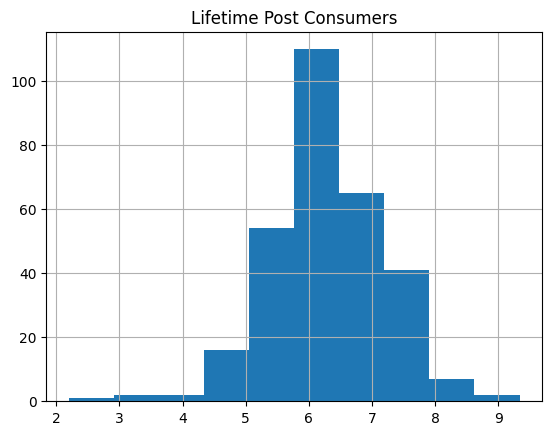

In [7]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [8]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [9]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
# Como solo tenemos una numérica, la podemos dejar sin escalar:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


# Ajustamos en Train y transformamos en Val y Test:
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
XtestT  =  XtrainFit.transform(Xtest)

In [10]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1007.420
Desv-Est y-logaritmo: 0.906


## **Ejercicio 3**


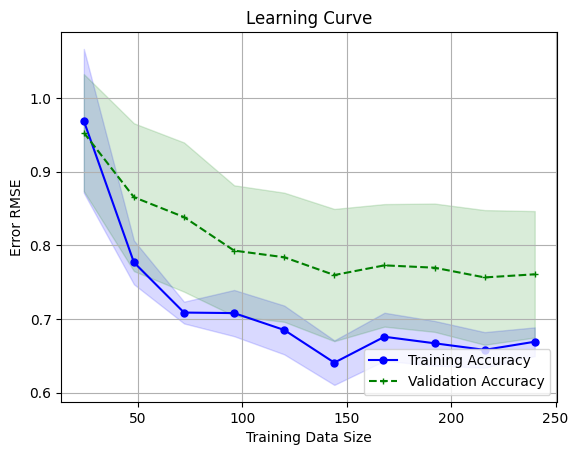

In [11]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=20,
                                    criterion='squared_error',
                                    max_depth=10,
                                    min_samples_split = 20,
                                    min_samples_leaf = 2,
                                    max_features= 'sqrt',
                                    bootstrap=True,
                                    oob_score=True,
                                    random_state=1)


# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [12]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de los nejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=20,
                                    criterion='squared_error',
                                    max_depth=10,
                                    min_samples_split = 20,
                                    min_samples_leaf = 2,
                                    max_features= 'sqrt',
                                    bootstrap=True,
                                    oob_score=True,
                                    random_state=1)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.729


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [13]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias para
# responder el Ejercicio 4.

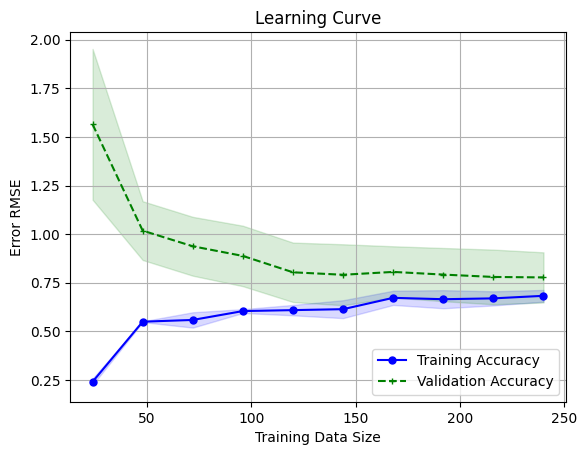

In [14]:
#
# Extreme Gradient Boost XGBoost()
# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_XGB = XGBRegressor(booster = 'gblinear',
                            eval_metric = 'rmse',
                            predictor = 'cpu_predictor',
                            n_estimators = 1000,
                            max_depth = 16,
                            random_state = 1)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++


mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_XGB)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)


# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


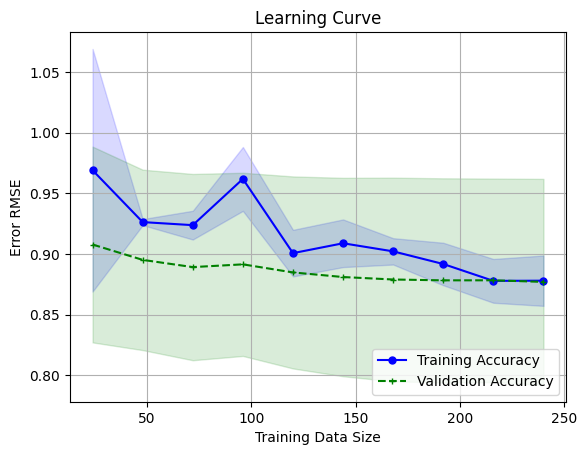

In [16]:
#
# Maquina de Vector de Soporte SVR()
# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_SVR = SVR(C = 0.1,
                   epsilon = 0.001,
                   gamma = 'scale',
                   kernel = 'rbf')

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_SVR)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


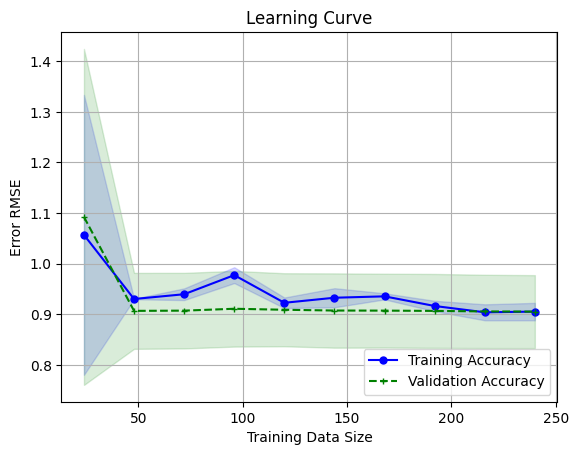

In [18]:
#
# Red Neuronal Perceptron Multicapa ()
# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++
#
#
elmodelo_MLP = MLPRegressor(max_iter=1000,
                            activation = 'logistic',
                            hidden_layer_sizes = (100,),
                            learning_rate = 'constant',
                            random_state = 1)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_MLP)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

El ejercicio nos muestra el poder de cada uno de los modelos y la complejidad de estos con respecto a sus hiperparametros. La seleccion de los hiperparametros , desde mi punto de vista como estudiante de machine learning , esta es una combinacion de ciencia y arte. Cada modelo y debido a mi seleccion de sus hiperparametros, aunque si llegaron a un nivel de aprendizaje y convergencia, mostraron ciertas diferencias en cuanto a su desempeño.

A continuacion mis observaciones sobre el desempeño de cada modelo.

**RandomForestRegressor:** el modelo se sobre entrena con menor cantidad de datos (< 75) . Luego mantiene un RMSE estable pero con una alta diferencia (varianza) con respecto a los datos de entrenamiento, lo que me indica un subentrenamiento.

**XGBRegressor**: el modelo nos muestra un buen desempeño con mejoria proporcional a la cantidad de datos los que nos muestra un buen nivel de aprendizaje. La varianza dismunuye y posiblemente continuaria dismuniyendo si tuvieramos mas datos para entrenar el modelo

**SVR**: El modelo de maquina de vector de soporte nos muestra un buen desempeño con bajo numero de datos y mejorias paulatinas a medida que la cantidad de datos aumenta para las curvas de entrenamiento y validacion convergiendo con aproximadamente 220 datos donde seria recomendable terminar el proceso de aprendizaje

**MPL**: la curva de aprendizaje del modelo de red neuronal de perceptron multicapa alcanza y mantiene un minimo que no varia en absoluto a medida que el volumen de datos aumenta. En el caso del MPL considero que esto es un problema de falta de complejidad del modelo y que require entonacion adicional de sus hiperparametros

**Conclusion Final:**

Considero que el modelo XGBRegressor fue el que tuvo el mejor desempeño considerando los hiperparametros seleccionados para cada uno de los modelos evaluados asi como con respecto al volumen de datos disponible para el entrenamiento.

Este modelo mostro disminucion de sesgo y varianza y si bien pudiese haber sido beneficiado de major volumen de datos, tuvo un desempeño satisfactorio





### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**